In [1]:
# -*- coding:UTF-8 -*-
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Define LSTM Neural Networks
class LstmRNN(nn.Module):
    """
        Parameters：
        - input_size: feature size
        - hidden_size: number of hidden units
        - output_size: number of output
        - num_layers: layers of LSTM to stack
    """
    def __init__(self, input_size, hidden_size=1, output_size=1, num_layers=1):
        super().__init__()
 
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers) # utilize the LSTM model in torch.nn 
        self.linear = nn.Linear(hidden_size, output_size)
 
    def forward(self, _x):
        x, _ = self.lstm(_x)  # _x is input, size (seq_len, batch, input_size)
        s, b, h = x.shape  # x is output, size (seq_len, batch, hidden_size)
        x = x.view(s*b, h)
        x = self.linear(x)
        x = x.view(s, b, -1)
        return x

In [4]:
nn.LSTM?

In [12]:
# create database
data_len = 200
t = np.linspace(0, 12*np.pi, data_len)
sin_t = np.sin(t)
cos_t = np.cos(t)

dataset = np.zeros((data_len, 2))
dataset[:,0] = sin_t
dataset[:,1] = cos_t
dataset = dataset.astype('float32')
dataset

array([[ 0.00000000e+00,  1.00000000e+00],
       [ 1.88311666e-01,  9.82109308e-01],
       [ 3.69885296e-01,  9.29077446e-01],
       [ 5.38223922e-01,  8.42801869e-01],
       [ 6.87304139e-01,  7.26369739e-01],
       [ 8.11791718e-01,  5.83947122e-01],
       [ 9.07232225e-01,  4.20630068e-01],
       [ 9.70210791e-01,  2.42262274e-01],
       [ 9.98473883e-01,  5.52260317e-02],
       [ 9.91010189e-01, -1.33786276e-01],
       [ 9.48086858e-01, -3.18011522e-01],
       [ 8.71239662e-01, -4.90857899e-01],
       [ 7.63218284e-01, -6.46140695e-01],
       [ 6.27887964e-01, -7.78303742e-01],
       [ 4.70090955e-01, -8.82617950e-01],
       [ 2.95473456e-01, -9.55350935e-01],
       [ 1.10283501e-01, -9.93900180e-01],
       [-7.88525417e-02, -9.96886313e-01],
       [-2.65167147e-01, -9.64202464e-01],
       [-4.41993684e-01, -8.97018135e-01],
       [-6.03005111e-01, -7.97737300e-01],
       [-7.42440164e-01, -6.69912338e-01],
       [-8.55309725e-01, -5.18117011e-01],
       [-9.

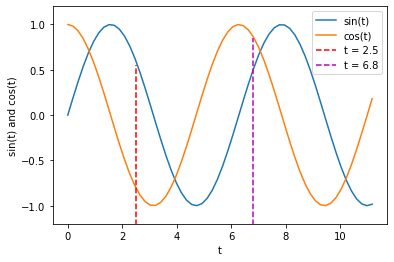

In [5]:
# plot part of the original dataset
plt.figure()
plt.plot(t[0:60], dataset[0:60,0], label='sin(t)')
plt.plot(t[0:60], dataset[0:60,1], label = 'cos(t)')
plt.plot([2.5, 2.5], [-1.3, 0.55], 'r--', label='t = 2.5') # t = 2.5
plt.plot([6.8, 6.8], [-1.3, 0.85], 'm--', label='t = 6.8') # t = 6.8
plt.xlabel('t')
plt.ylim(-1.2, 1.2)
plt.ylabel('sin(t) and cos(t)')
plt.legend(loc='upper right')

# choose dataset for training and testing
train_data_ratio = 0.5 # Choose 80% of the data for testing
train_data_len = int(data_len*train_data_ratio)
train_x = dataset[:train_data_len, 0]
train_y = dataset[:train_data_len, 1]
INPUT_FEATURES_NUM = 1
OUTPUT_FEATURES_NUM = 1
t_for_training = t[:train_data_len]

# test_x = train_x
# test_y = train_y
test_x = dataset[train_data_len:, 0]
test_y = dataset[train_data_len:, 1]
t_for_testing = t[train_data_len:]

In [6]:
# ----------------- train -------------------
train_x_tensor = train_x.reshape(-1, 5, INPUT_FEATURES_NUM) # set batch size to 5
train_y_tensor = train_y.reshape(-1, 5, OUTPUT_FEATURES_NUM) # set batch size to 5

In [7]:
# transfer data to pytorch tensor
train_x_tensor = torch.from_numpy(train_x_tensor)
train_y_tensor = torch.from_numpy(train_y_tensor)
# test_x_tensor = torch.from_numpy(test_x)


In [8]:
lstm_model = LstmRNN(INPUT_FEATURES_NUM, 16, output_size=OUTPUT_FEATURES_NUM, num_layers=1) # 16 hidden units
print('LSTM model:', lstm_model)
print('model.parameters:', lstm_model.parameters)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-2)

max_epochs = 10000
for epoch in range(max_epochs):
    output = lstm_model(train_x_tensor)
    loss = loss_function(output, train_y_tensor)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if loss.item() < 1e-4:
        print('Epoch [{}/{}], Loss: {:.5f}'.format(epoch+1, max_epochs, loss.item()))
        print("The loss value is reached")
        break
    elif (epoch+1) % 100 == 0:
        print('Epoch: [{}/{}], Loss:{:.5f}'.format(epoch+1, max_epochs, loss.item()))

# prediction on training dataset
predictive_y_for_training = lstm_model(train_x_tensor)
predictive_y_for_training = predictive_y_for_training.view(-1, OUTPUT_FEATURES_NUM).data.numpy()

LSTM model: LstmRNN(
  (lstm): LSTM(1, 16)
  (forwardCalculation): Linear(in_features=16, out_features=1, bias=True)
)
model.parameters: <bound method Module.parameters of LstmRNN(
  (lstm): LSTM(1, 16)
  (forwardCalculation): Linear(in_features=16, out_features=1, bias=True)
)>
Epoch: [100/10000], Loss:0.00103
Epoch: [200/10000], Loss:0.00039
Epoch: [300/10000], Loss:0.00029
Epoch: [400/10000], Loss:0.00021
Epoch: [500/10000], Loss:0.00018
Epoch: [600/10000], Loss:0.00017
Epoch: [700/10000], Loss:0.00015
Epoch: [800/10000], Loss:0.00014
Epoch: [900/10000], Loss:0.00014
Epoch: [1000/10000], Loss:0.00013
Epoch: [1100/10000], Loss:0.00013
Epoch: [1200/10000], Loss:0.00012
Epoch: [1300/10000], Loss:0.00012
Epoch: [1400/10000], Loss:0.00011
Epoch: [1500/10000], Loss:0.00011
Epoch: [1600/10000], Loss:0.00012
Epoch [1699/10000], Loss: 0.00010
The loss value is reached


In [10]:
    # torch.save(lstm_model.state_dict(), 'model_params.pkl') # save model parameters to files

# ----------------- test -------------------
# lstm_model.load_state_dict(torch.load('model_params.pkl'))  # load model parameters from files
lstm_model = lstm_model.eval() # switch to testing model

# prediction on test dataset
test_x_tensor = test_x.reshape(-1, 5, INPUT_FEATURES_NUM) # set batch size to 5, the same value with the training set
test_x_tensor = torch.from_numpy(test_x_tensor)

predictive_y_for_testing = lstm_model(test_x_tensor)
predictive_y_for_testing = predictive_y_for_testing.view(-1, OUTPUT_FEATURES_NUM).data.numpy()

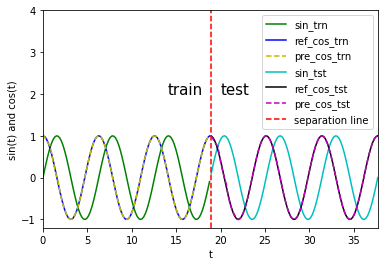

In [11]:
# ----------------- plot -------------------
plt.figure()
plt.plot(t_for_training, train_x, 'g', label='sin_trn')
plt.plot(t_for_training, train_y, 'b', label='ref_cos_trn')
plt.plot(t_for_training, predictive_y_for_training, 'y--', label='pre_cos_trn')

plt.plot(t_for_testing, test_x, 'c', label='sin_tst')
plt.plot(t_for_testing, test_y, 'k', label='ref_cos_tst')
plt.plot(t_for_testing, predictive_y_for_testing, 'm--', label='pre_cos_tst')

plt.plot([t[train_data_len], t[train_data_len]], [-1.2, 4.0], 'r--', label='separation line') # separation line

plt.xlabel('t')
plt.ylabel('sin(t) and cos(t)')
plt.xlim(t[0], t[-1])
plt.ylim(-1.2, 4)
plt.legend(loc='upper right')
plt.text(14, 2, "train", size = 15, alpha = 1.0)
plt.text(20, 2, "test", size = 15, alpha = 1.0)

plt.show()